R-squared score: 0.9532965608925621
Predicted Active Demat Accounts for January 2025: 165.50 million


c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


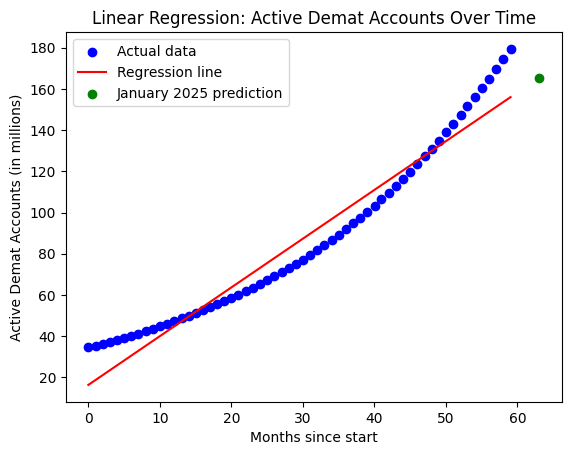

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

# Load the data
df = pd.read_csv('demat_data.csv')

# Convert Year to string type
df['Year'] = df['Year'].astype(str)

# Convert Month and Year to datetime
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')

# Create a numerical representation of the date (months since the start)
df['Months'] = (df['Date'] - df['Date'].min()).dt.days / 30.44  # Average days in a month

# Prepare the data for linear regression
X = df[['Months']]
y = df['Active Demat Accounts (in millions)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the R-squared score
r_squared = model.score(X_test, y_test)
print(f"R-squared score: {r_squared}")

# Predict for January 2025
jan_2025 = pd.to_datetime('Jan 2025', format='%b %Y')
months_until_jan_2025 = (jan_2025 - df['Date'].min()).days / 30.44
prediction = model.predict([[months_until_jan_2025]])

print(f"Predicted Active Demat Accounts for January 2025: {prediction[0]:.2f} million")

# Optional: Plot the data and the regression line
import matplotlib.pyplot as plt

plt.scatter(df['Months'], df['Active Demat Accounts (in millions)'], color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.scatter([[months_until_jan_2025]], prediction, color='green', label='January 2025 prediction')
plt.xlabel('Months since start')
plt.ylabel('Active Demat Accounts (in millions)')
plt.title('Linear Regression: Active Demat Accounts Over Time')
plt.legend()
plt.show()